## part 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data/network_backup_dataset.csv',header=0)
df_index=['Week #','Day of Week','Backup Start Time - Hour of Day','Work-Flow-ID','File Name','Size of Backup (GB)','Backup Time (hour)','day number']
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

In [4]:
day_number=[]
for weeknum,dayofweek in np.array(df[df_index[:2]]):
    day_number.append((weeknum-1)*7+map_day[dayofweek])
df['day number']=day_number

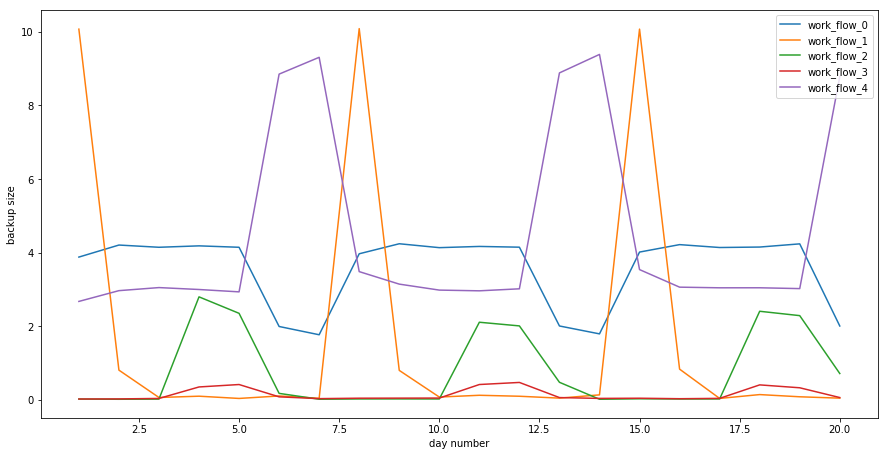

In [5]:
df_part1a=df.loc[df[df_index[-1]]<=20]
workflowlist=np.unique(df_part1a[df_index[3]])
plt.figure(figsize = (15,7.5))
for i in range(len(workflowlist)):
    temp=df_part1a.loc[df_part1a[df_index[3]]==workflowlist[i]]
    tempbackup=[]
    for j in range(1,21):
        tempbackup.append(sum(temp.loc[temp[df_index[-1]]==j][df_index[5]]))
    plt.plot(range(1,21),tempbackup,label=workflowlist[i])
plt.legend(loc = 'upper right')
plt.ylabel('backup size')
plt.xlabel('day number')
plt.show()

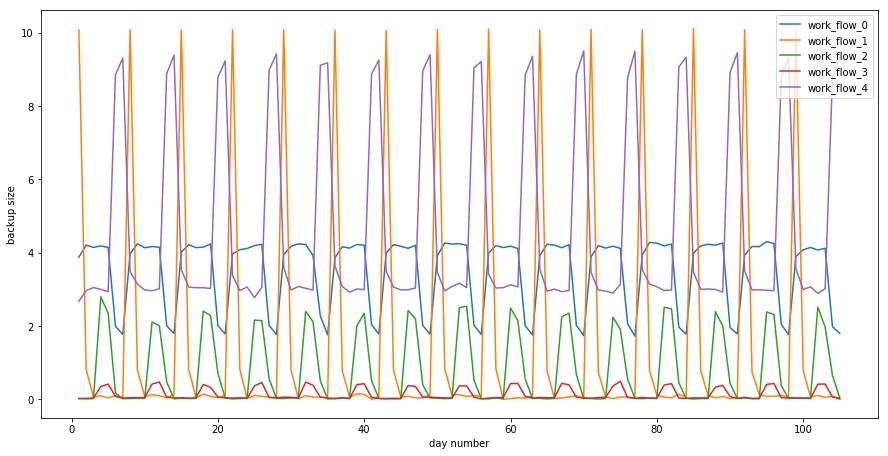

In [6]:
df_part1b=df.loc[df[df_index[-1]]<=105]
workflowlist=np.unique(df_part1b[df_index[3]])
plt.figure(figsize = (15,7.5))
for i in range(len(workflowlist)):
    temp=df_part1b.loc[df_part1b[df_index[3]]==workflowlist[i]]
    tempbackup=[]
    for j in range(1,106):
        tempbackup.append(sum(temp.loc[temp[df_index[-1]]==j][df_index[5]]))
    plt.plot(range(1,106),tempbackup,label=workflowlist[i])
plt.legend(loc = 'upper right')
plt.ylabel('backup size')
plt.xlabel('day number')
plt.show()

## part 2)

### a)

In [7]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [8]:
df.tail(3)

Week # Day of Week  Backup Start Time - Hour of Day Work-Flow-ID  \
18585      15      Sunday                               21  work_flow_4   
18586      15      Sunday                               21  work_flow_4   
18587      15      Sunday                               21  work_flow_4   

      File Name  Size of Backup (GB)  Backup Time (hour)  day number  
18585   File_26             0.198572                   2         105  
18586   File_25             0.199570                   2         105  
18587   File_24             0.201201                   2         105

In [9]:
week_number=df[df_index[0]].tolist()
day_of_week=[]
for day in df[df_index[1]].tolist():
    day_of_week.append(map_day[day])
hour_of_day=df[df_index[2]].tolist()
workflowid=df[df_index[3]].tolist()
for i in range(len(workflowid)):
    workflowid[i]=workflowid[i][-1]
    workflowid[i]=int(workflowid[i])
filename=df[df_index[4]].tolist()
for i in range(len(filename)):
    filename[i]=filename[i].replace('File_','')
    filename[i]=int(filename[i])

In [10]:
featurematrix=np.stack((week_number,day_of_week,hour_of_day,workflowid,filename),axis=-1)

In [11]:
y=df[df_index[5]].tolist()

In [12]:
basicregression=LinearRegression()

In [13]:
from sklearn.model_selection import cross_validate
cv_results=cross_validate(basicregression, featurematrix, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)

In [14]:
cv_results['train_score']

array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
       -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])

In [15]:
cv_results['test_score']

array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
       -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943])

In [16]:
def reportandplot(clf,X,y):
    results=cross_validate(clf, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
    clf.fit(X,y)
    y_predict=clf.predict(X)
    plt.scatter(y,y_predict)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw = 4)
    plt.xlabel('True values')
    plt.ylabel('Fitted values')
    plt.show()
    plt.scatter(y_predict,y-y_predict)
    plt.xlabel('Fitted values')
    plt.ylabel('Residual')
    plt.show()
    return results

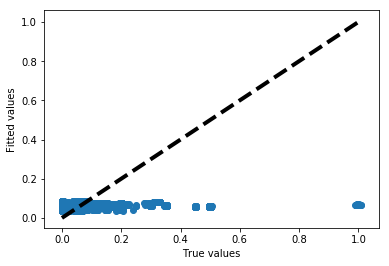

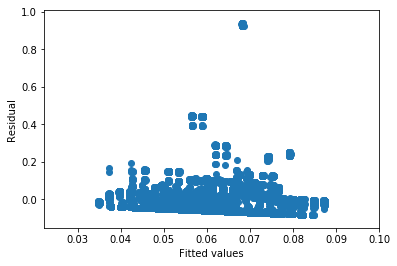

{'fit_time': array([ 0.00715399,  0.00696611,  0.00581622,  0.00388503,  0.00406122,
         0.00568008,  0.00396299,  0.00639606,  0.00639105,  0.00354004]),
 'score_time': array([ 0.00038004,  0.000422  ,  0.00031376,  0.00027704,  0.00032997,
         0.00090909,  0.00036407,  0.00084591,  0.00051689,  0.00028396]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [17]:
reportandplot(basicregression,featurematrix,y)

In [18]:
stand=StandardScaler()
X_stand=stand.fit_transform(featurematrix)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


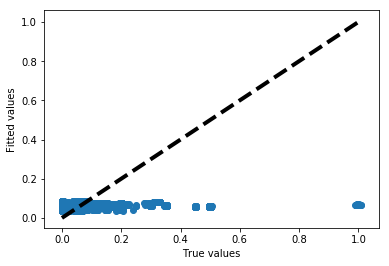

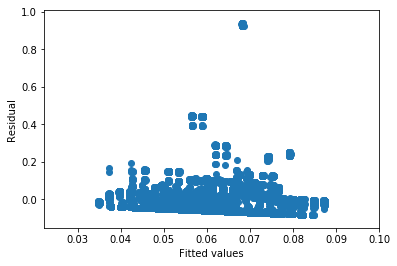

{'fit_time': array([ 0.00662184,  0.00519705,  0.00649714,  0.00473404,  0.00382113,
         0.00412083,  0.00330901,  0.0031929 ,  0.0032289 ,  0.00321937]),
 'score_time': array([ 0.00078321,  0.00039196,  0.00049877,  0.00031495,  0.0002749 ,
         0.00027013,  0.00024819,  0.00023794,  0.00022912,  0.00030279]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [19]:
reportandplot(basicregression,X_stand,y)

In [20]:
from sklearn.feature_selection import f_regression
f_regression(featurematrix,y)

(array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
          2.61386654e+01,   2.53200943e+01]),
 array([  9.26759237e-01,   4.75614169e-10,   1.62474985e-34,
          3.20909922e-07,   4.90153868e-07]))

In [21]:
from sklearn.feature_selection import mutual_info_regression
mutualscore=mutual_info_regression(featurematrix,y)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [23]:
np.argsort(mutualscore)

array([0, 1, 2, 3, 4])

In [24]:
mutualscore

array([ 0.00077814,  0.22552197,  0.23043138,  0.27272962,  0.43227529])

In [26]:
featurematrix[:,2:]

array([[ 1,  0,  0],
       [ 1,  2, 12],
       [ 1,  2, 13],
       ..., 
       [21,  4, 26],
       [21,  4, 25],
       [21,  4, 24]])

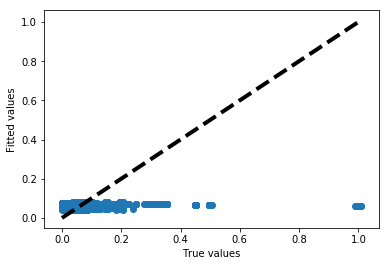

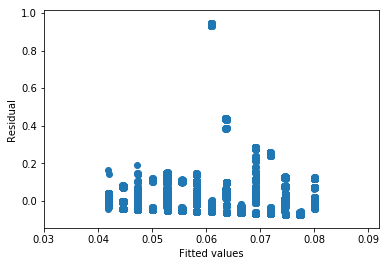

{'fit_time': array([ 0.00432897,  0.00383401,  0.00321817,  0.00368309,  0.003824  ,
         0.00406814,  0.00568891,  0.0048511 ,  0.00373411,  0.00382614]),
 'score_time': array([ 0.00026608,  0.00019503,  0.00019407,  0.00021482,  0.00023413,
         0.00025702,  0.00037909,  0.00027514,  0.000247  ,  0.00024295]),
 'test_score': array([-0.0114225 , -0.01003736, -0.01145544, -0.01007821, -0.01151353,
        -0.01009186, -0.01149547, -0.01009676, -0.01150352, -0.00999224]),
 'train_score': array([-0.01068007, -0.01083378, -0.01067618, -0.01082926, -0.01066974,
        -0.01082779, -0.01067173, -0.01082728, -0.01067094, -0.01083877])}

In [28]:
reportandplot(basicregression,featurematrix[:,2:],y)

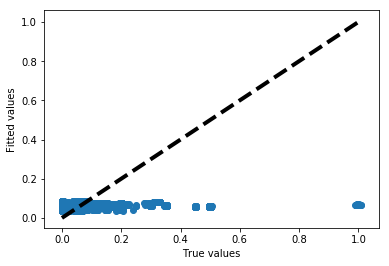

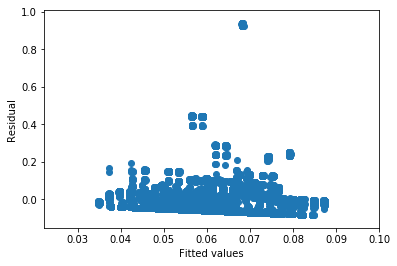

{'fit_time': array([ 0.00497293,  0.00440526,  0.00360298,  0.00552607,  0.00538898,
         0.00592208,  0.00433421,  0.00501776,  0.00362015,  0.00370097]),
 'score_time': array([ 0.0003829 ,  0.00035191,  0.00027609,  0.00049901,  0.00049901,
         0.00059009,  0.00045204,  0.00038624,  0.00032592,  0.00039768]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [30]:
reportandplot(basicregression,X_stand,y)